In [3]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
 'Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [4]:
import numpy as np
data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
 print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [5]:
import numpy as np
data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
 print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [6]:
data1=data
data1 = data1.fillna(data1.median())
print('\nAfter replacing missing values:')


After replacing missing values:


In [7]:
print(data1[20:25])

    Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
20                7                        3                         2   
21               10                        5                         5   
22                3                        1                         1   
23                8                        4                         5   
24                1                        1                         1   

    Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
20                 10                            5          10   
21                  3                            6           7   
22                  1                            2           1   
23                  1                            2           1   
24                  1                            2           1   

    Bland Chromatin  Normal Nucleoli  Mitoses  Class  
20                5                4        4      4  
21                7               10        1   

In [8]:
print('Number of rows in original data = %d' % (data.shape[0]))
data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


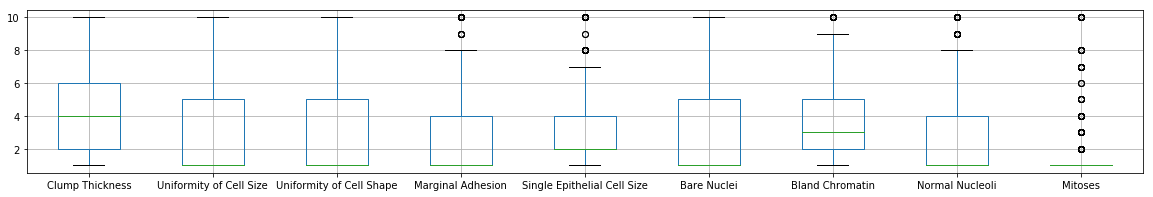

In [9]:
%matplotlib inline
data_box_data1 = data1.drop(['Class'],axis=1)
data_box_data1['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])
data_box_data1.boxplot(figsize=(20,3))

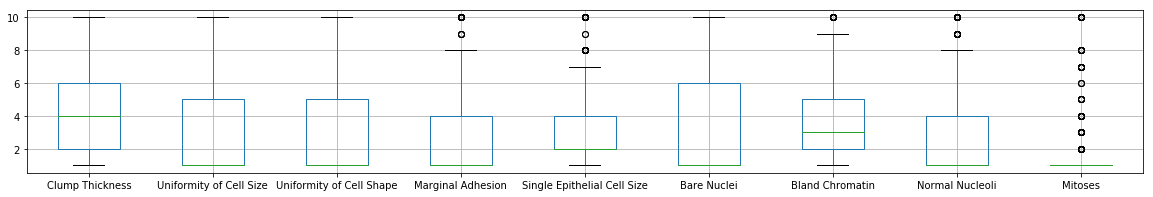

In [10]:
%matplotlib inline
data_box_data2 = data2.drop(['Class'],axis=1)
data_box_data2['Bare Nuclei'] = pd.to_numeric(data_box_data2['Bare Nuclei'])
data_box_data2.boxplot(figsize=(20,3))

In [15]:
Z_data1 = (data_box_data1-data_box_data1.mean())/data_box_data1.std()
Z_data1[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.798376,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.970088,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,-0.686488,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666


In [16]:
Z_data2 = (data_box_data2-data_box_data2.mean())/data_box_data2.std()
Z_data2[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.906788,-0.049200,-0.406623,2.502944,0.794274,1.771569,0.634734,0.370269,1.383283
21,1.970331,0.603298,0.597198,0.059290,1.244099,0.948266,1.451161,2.335764,-0.348145
22,-0.511269,-0.701698,-0.741230,-0.638897,-0.555202,-0.698341,-0.589908,-0.612478,-0.348145
24,-1.220297,-0.701698,-0.741230,-0.638897,-0.555202,-0.698341,-0.181694,-0.612478,-0.348145
25,0.197760,-0.375449,-0.072016,0.408383,-0.555202,0.948266,-0.181694,1.025434,-0.348145


In [19]:
# drop 1 row เปลี่ยน 10 เป็น 9
Z1 = Z_data1.loc[((Z_data1 > -3).sum(axis=1)==9) & ((Z_data1 <= 3).sum(axis=1)==9),:]
print('Number of rows = %d' % (Z1.shape[0]))

Number of rows = 648


In [20]:
Z2 = Z_data2.loc[((Z_data2 > -3).sum(axis=1)==9) & ((Z_data2 <= 3).sum(axis=1)==9),:]
print('Number of rows = %d' % (Z2.shape[0]))

Number of rows = 632


In [21]:
data1_x = data1.drop(['Class'],axis=1)
print('Number of instances = %d' % (data1_x.shape[0]))
print('Number of attributes = %d' % (data1_x.shape[1]))
data1_x.head()
data1_y = data1['Class']
print('Number of instances = %d' % (data1_y.shape[0]))

Number of instances = 699
Number of attributes = 9
Number of instances = 699


In [25]:
data1_y.head()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data1_x, data1_y, test_size = 0.2,random_state = 0)

Text(0, 0.5, 'Accuracy')

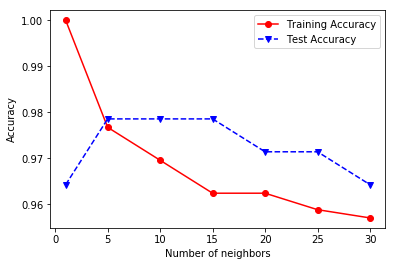

In [26]:
# for Fill-in missing

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knnd1 = []
for k in numNeighbors:
 clf_knnd1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
 clf_knnd1.fit(X_train, Y_train)
 Y_predTrain_knnd1 = clf_knnd1.predict(X_train)
 Y_predTest_knnd1 = clf_knnd1.predict(X_test)
 trainAcc_knnd1.append(accuracy_score(Y_train, Y_predTrain_knnd1))
 testAcc_knnd1.append(accuracy_score(Y_test, Y_predTest_knnd1))
plt.plot(numNeighbors, trainAcc_knnd1, 'ro-', numNeighbors, testAcc_knnd1,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy') 

In [27]:
data2_x = data2.drop(['Class'],axis=1)
print('Number of instances = %d' % (data2_x.shape[0]))
print('Number of attributes = %d' % (data2_x.shape[1]))
data2_x.head()
data2_y = data2['Class']
print('Number of instances = %d' % (data2_y.shape[0]))

Number of instances = 683
Number of attributes = 9
Number of instances = 683


In [28]:
data2_y.head()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data2_x, data2_y, test_size = 0.2,random_state = 0)

Text(0, 0.5, 'Accuracy')

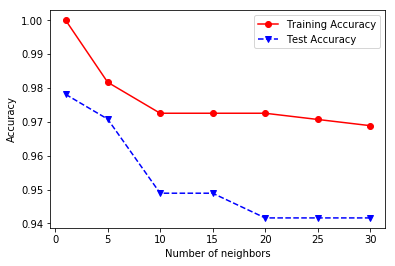

In [29]:
# K-NN with Ignored Missing 

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knnd2 = []
for k in numNeighbors:
 clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
 clf_knnd2.fit(X_train, Y_train)
 Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
 Y_predTest_knnd2 = clf_knnd2.predict(X_test)
 trainAcc_knnd2.append(accuracy_score(Y_train, Y_predTrain_knnd2))
 testAcc_knnd2.append(accuracy_score(Y_test, Y_predTest_knnd2))
plt.plot(numNeighbors, trainAcc_knnd2, 'ro-', numNeighbors, testAcc_knnd2,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy') 

Text(0, 0.5, 'Accuracy')

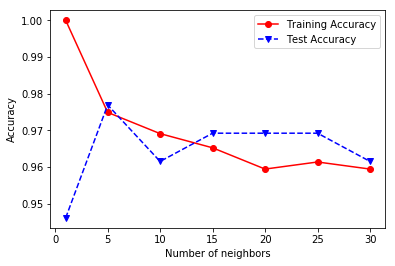

In [38]:
# K-NN with Fill-in Missing + Managing Outlier

C = data1.drop(['Class'],axis=1)
C['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])

C1 = (C-C.mean())/C.std()
Z1 = data1.loc[((C1 > -3).sum(axis=1)==9) & ((C1 <= 3).sum(axis=1)==9),:]

data1_x = Z1.drop(['Class'],axis=1)
data1_y = Z1['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data1_x, data1_y, test_size = 0.2,random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knndC = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, Y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd2.append(accuracy_score(Y_train,Y_predTrain_knnd2))
    testAcc_knndC.append(accuracy_score(Y_test,Y_predTest_knnd2))


plt.plot(numNeighbors,trainAcc_knnd2,'ro-',numNeighbors,testAcc_knndC,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')


Text(0, 0.5, 'Accuracy')

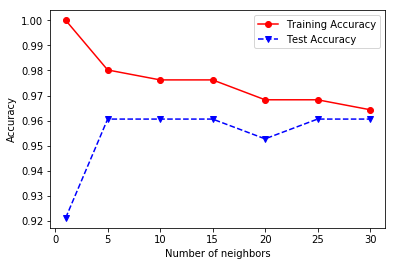

In [44]:
# K-NN with Ignored Missing + Managing Outlier

D = data2.drop(['Class'],axis=1)
D['Bare Nuclei'] = pd.to_numeric(D['Bare Nuclei'])

#manging
D2 = (D-D.mean())/D.std()
Z2 = data2.loc[((D2 > -3).sum(axis=1)==9) & ((D2 <= 3).sum(axis=1)==9),:]

data2_x = Z2.drop(['Class'],axis=1)
data2_y = Z2['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data2_x, data2_y, test_size = 0.2,random_state = 0)


from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knndD = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, Y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd2.append(accuracy_score(Y_train,Y_predTrain_knnd2))
    testAcc_knndD.append(accuracy_score(Y_test,Y_predTest_knnd2))

plt.plot(numNeighbors,trainAcc_knnd2,'ro-',numNeighbors,testAcc_knndD,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')


Text(0, 0.5, 'Accuracy')

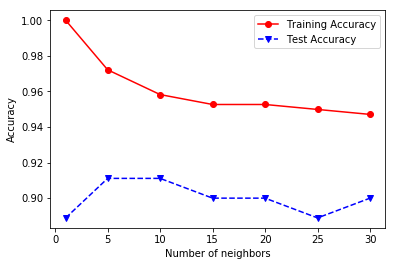

In [45]:
# K-NN with Fill-in Missing + Managing Outlier + Managing Duplicate data

import pandas as pd

dataE = data1.drop_duplicates()

E = dataE.drop(['Class'],axis=1)
E['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])
#manging
E2 = (E-E.mean())/E.std()
Z1 = dataE.loc[((E2 > -3).sum(axis=1)==9) & ((E2 <= 3).sum(axis=1)==9),:]

data1_x = Z1.drop(['Class'],axis=1)
data1_y = Z1['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data1_x, data1_y, test_size = 0.2,random_state = 0)

#---------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knndE = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, Y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd2.append(accuracy_score(Y_train,Y_predTrain_knnd2))
    testAcc_knndE.append(accuracy_score(Y_test,Y_predTest_knnd2))


plt.plot(numNeighbors,trainAcc_knnd2,'ro-',numNeighbors,testAcc_knndE,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')


Text(0, 0.5, 'Accuracy')

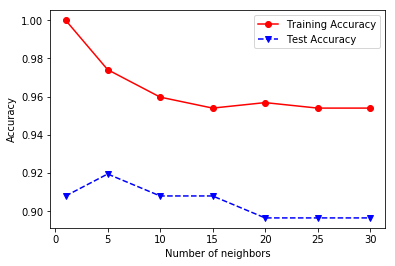

In [99]:
# K-NN with  Ignored Missing + Managing Outlier + Managing Duplicate data

import pandas as pd

dataF = data2.drop_duplicates()

F = dataF.drop(['Class'],axis=1)
F['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])

F2 = (F-F.mean())/F.std()
Z1 = dataF.loc[((F2 > -3).sum(axis=1)==9) & ((F2 <= 3).sum(axis=1)==9),:]

data1_x = Z1.drop(['Class'],axis=1)
data1_y = Z1['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data1_x, data1_y, test_size = 0.2,random_state = 0)


from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knndF = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, Y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd2.append(accuracy_score(Y_train,Y_predTrain_knnd2))
    testAcc_knndF.append(accuracy_score(Y_test,Y_predTest_knnd2))

plt.plot(numNeighbors,trainAcc_knnd2,'ro-',numNeighbors,testAcc_knndF,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

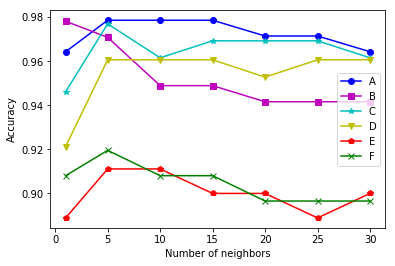

In [98]:
# เปรียบเทียบ
plt.plot(numNeighbors,testAcc_knnd1,'bo-')
plt.plot(numNeighbors,testAcc_knnd2,'ms-')
plt.plot(numNeighbors,testAcc_knndC,'c*-')
plt.plot(numNeighbors,testAcc_knndD,'yv-')
plt.plot(numNeighbors,testAcc_knndE,'rp-')
plt.plot(numNeighbors,testAcc_knndF,'gx-')

plt.legend(['A','B','C','D','E','F'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [104]:
print(testAcc_knnd1)
print(np.mean(testAcc_knnd1))
print()
print(testAcc_knnd2)
print(np.mean(testAcc_knnd2))
print()
print(testAcc_knndC)
print(np.mean(testAcc_knndC))
print()
print(testAcc_knndD)
print(np.mean(testAcc_knndD))
print()
print(testAcc_knndE)
print(np.mean(testAcc_knndE))
print()
print(testAcc_knndF)
print(np.mean(testAcc_knndF))

[0.9642857142857143, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9714285714285714, 0.9714285714285714, 0.9642857142857143]
0.9724489795918367

[0.9781021897810219, 0.9708029197080292, 0.948905109489051, 0.948905109489051, 0.9416058394160584, 0.9416058394160584, 0.9416058394160584]
0.9530761209593326

[0.9461538461538461, 0.9769230769230769, 0.9615384615384616, 0.9692307692307692, 0.9692307692307692, 0.9692307692307692, 0.9615384615384616]
0.9648351648351648

[0.9212598425196851, 0.9606299212598425, 0.9606299212598425, 0.9606299212598425, 0.952755905511811, 0.9606299212598425, 0.9606299212598425]
0.9538807649043869

[0.8888888888888888, 0.9111111111111111, 0.9111111111111111, 0.9, 0.9, 0.8888888888888888, 0.9]
0.9000000000000001

[0.9080459770114943, 0.9195402298850575, 0.9080459770114943, 0.9080459770114943, 0.896551724137931, 0.896551724137931, 0.896551724137931]
0.9047619047619045
